## Introduction

 We're tasked with predicting which employees are likely to leave the company using past data. Unfortunately, the past data doesn't have labels indicating whether an employee stayed or left, hence the target variable is missing. 
 
 We'll likely employ machine learning techniques to build a predictive model. We'll use features such as years worked, salary change, distance from workplace, etc., to train our model. 

In [33]:
import pandas as pd

class SME():
    
    def __init__(self):
        self.asked = 0
        self.df = self.get()
        
    def get(self):
        X_train = pd.read_csv('https://raw.githubusercontent.com/msaricaumbc/DS_data/master/ds602/final3/X_train.csv')
        y_train = pd.read_csv('https://raw.githubusercontent.com/msaricaumbc/DS_data/master/ds602/final3/y_train.csv')

        X_train['Left'] = y_train
        return X_train
    
    def ask(self, gender, distance, years_worked, hire_date, prev_salary, current_salary, dep_code):
        self.asked += 1
        #  print(self.asked)
        
        if self.asked > 500:
            raise Exception("Sorry, you have asked enough")
            
        result = self.df.query(f"Gender=={gender} and Distance=='{distance}' and YearsWorked == {years_worked} and HireDate == '{hire_date}' and PreviousSalary == '{prev_salary}' and Salary == '{current_salary}' and DepartmentCode == {dep_code}")
        
        return result['Left']

In [2]:
sme = SME()

In [302]:
X_train = pd.read_csv('https://raw.githubusercontent.com/msaricaumbc/DS_data/master/ds602/final3/X_train.csv')

X_test = pd.read_csv('https://raw.githubusercontent.com/msaricaumbc/DS_data/master/ds602/final3/X_test.csv')
y_test = pd.read_csv('https://raw.githubusercontent.com/msaricaumbc/DS_data/master/ds602/final3/y_test.csv')



In [303]:
X_train

,Gender,Distance,YearsWorked,HireDate,PreviousSalary,Salary,DepartmentCode
0,0,~20miles,8,2007-09-05,63K,66K,3
1,0,>30miles,7,2011-10-16,60K,63K,3
2,0,~15miles,7,2011-05-18,59K,60K,3
3,1,<5mile,3,2000-06-30,60K,61K,2
4,1,~10miles,9,2010-04-28,56K,57K,7
...,...,...,...,...,...,...,...
7495,0,>30miles,5,2014-03-15,60K,62K,6
7496,0,~10miles,7,2011-07-10,64K,68K,3
7497,0,~10miles,8,2006-08-19,56K,57K,2
7498,0,~20miles,6,2016-09-18,60K,62K,5


In [304]:
df=X_train

In [305]:
df.describe()

,Gender,YearsWorked,DepartmentCode
count,7500.000000,7500.000000,7500.00000
mean,0.404133,7.013067,3.99360
std,0.490756,1.865840,2.15822
min,0.000000,1.000000,1.00000
25%,0.000000,6.000000,2.00000
50%,0.000000,7.000000,3.00000
75%,1.000000,8.000000,6.00000
max,1.000000,14.000000,7.00000


In [306]:
df.isnull().sum()

Gender             0
Distance          10
YearsWorked        0
HireDate           0
PreviousSalary     0
Salary             0
DepartmentCode     0
dtype: int64

In [307]:
from sklearn.impute import SimpleImputer
# Impute missing values in 'Distance' column with mode
imputer = SimpleImputer(strategy='most_frequent')
df['Distance'] = imputer.fit_transform(df[['Distance']])

In [308]:
df['Distance'].value_counts()

~10miles    2261
~15miles    2209
~20miles    1534
>30miles     764
<5mile       732
Name: Distance, dtype: int64

Here we encoded the distance column, and got 5 columns based on the distance.

In [309]:
from sklearn.preprocessing import OneHotEncoder

# Encode categorical columns
encoder = OneHotEncoder(sparse=False)
encoded_columns = pd.DataFrame(encoder.fit_transform(df[['Distance']]), columns=encoder.get_feature_names_out(['Distance']))

# Concatenate encoded columns with the original DataFrame
df_encoded = pd.concat([encoded_columns, df.drop(columns=['Distance'])], axis=1)

# Convert salary columns
df_encoded['PreviousSalary'] = df_encoded['PreviousSalary'].str.replace('K', '000').astype(int)
df_encoded['Salary'] = df_encoded['Salary'].str.replace('K', '000').astype(int)

C:\Users\bhava\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Encoding the categorical columns

In [310]:
df_encoded

,Distance_<5mile,Distance_>30miles,Distance_~10miles,Distance_~15miles,Distance_~20miles,Gender,YearsWorked,HireDate,PreviousSalary,Salary,DepartmentCode
0,0.0,0.0,0.0,0.0,1.0,0,8,2007-09-05,63000,66000,3
1,0.0,1.0,0.0,0.0,0.0,0,7,2011-10-16,60000,63000,3
2,0.0,0.0,0.0,1.0,0.0,0,7,2011-05-18,59000,60000,3
3,1.0,0.0,0.0,0.0,0.0,1,3,2000-06-30,60000,61000,2
4,0.0,0.0,1.0,0.0,0.0,1,9,2010-04-28,56000,57000,7
...,...,...,...,...,...,...,...,...,...,...,...
7495,0.0,1.0,0.0,0.0,0.0,0,5,2014-03-15,60000,62000,6
7496,0.0,0.0,1.0,0.0,0.0,0,7,2011-07-10,64000,68000,3
7497,0.0,0.0,1.0,0.0,0.0,0,8,2006-08-19,56000,57000,2
7498,0.0,0.0,0.0,0.0,1.0,0,6,2016-09-18,60000,62000,5


# Feature Engineering 

We created a new column, named Salary Change based on Previous Salary and Salary columns.

In [311]:
# Calculate percentage change in salary
df_encoded['SalaryChange'] = ((df_encoded['Salary'] - df_encoded['PreviousSalary']) / df_encoded['PreviousSalary']) * 100

In [312]:
df_encoded

,Distance_<5mile,Distance_>30miles,Distance_~10miles,Distance_~15miles,Distance_~20miles,Gender,YearsWorked,HireDate,PreviousSalary,Salary,DepartmentCode,SalaryChange
0,0.0,0.0,0.0,0.0,1.0,0,8,2007-09-05,63000,66000,3,4.761905
1,0.0,1.0,0.0,0.0,0.0,0,7,2011-10-16,60000,63000,3,5.000000
2,0.0,0.0,0.0,1.0,0.0,0,7,2011-05-18,59000,60000,3,1.694915
3,1.0,0.0,0.0,0.0,0.0,1,3,2000-06-30,60000,61000,2,1.666667
4,0.0,0.0,1.0,0.0,0.0,1,9,2010-04-28,56000,57000,7,1.785714
...,...,...,...,...,...,...,...,...,...,...,...,...
7495,0.0,1.0,0.0,0.0,0.0,0,5,2014-03-15,60000,62000,6,3.333333
7496,0.0,0.0,1.0,0.0,0.0,0,7,2011-07-10,64000,68000,3,6.250000
7497,0.0,0.0,1.0,0.0,0.0,0,8,2006-08-19,56000,57000,2,1.785714
7498,0.0,0.0,0.0,0.0,1.0,0,6,2016-09-18,60000,62000,5,3.333333


# Clustering

We used Kmeans clusters, and plotted elbow plot, to find the optimal number of clusters. 

C:\Users\bhava\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\bhava\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\bhava\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\bhava\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of

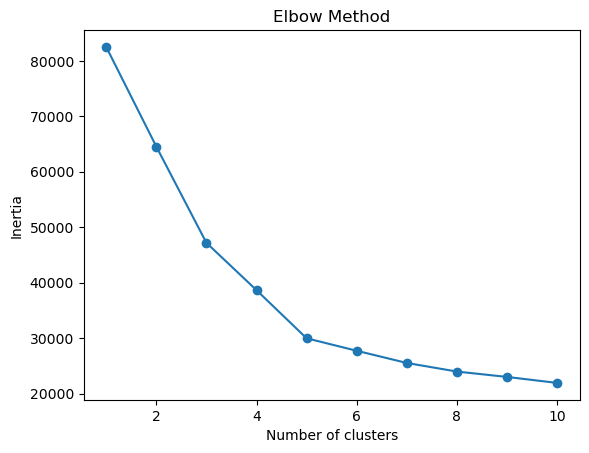

C:\Users\bhava\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [291]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt


# Extract feature variables
X = df_encoded.drop(columns=['PreviousSalary', 'Salary', 'HireDate'])

# Standardize the feature variables
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Determine the optimal number of clusters using the elbow method
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plot the elbow curve
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

C:\Users\bhava\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\bhava\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\bhava\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\bhava\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of

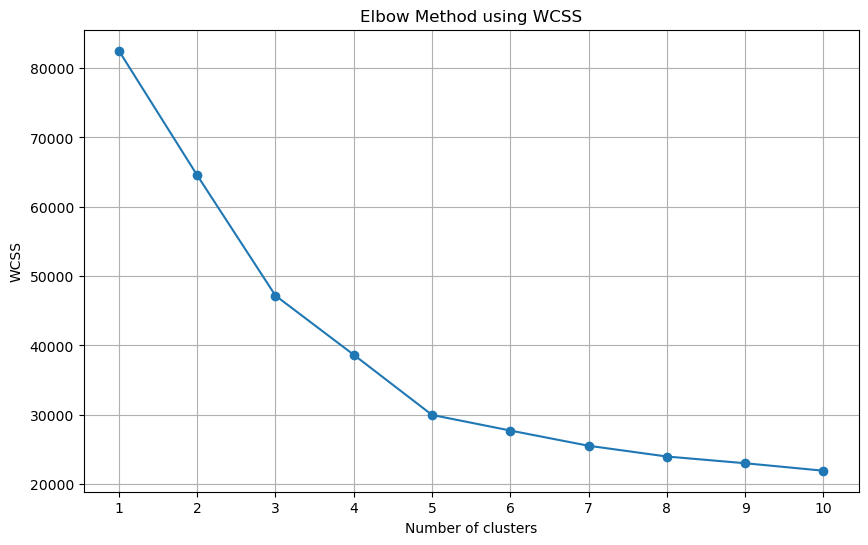

In [328]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Assuming df_encoded is your DataFrame

# Extract feature variables
X = df_encoded.drop(columns=['PreviousSalary', 'Salary', 'HireDate'])

# Standardize the feature variables
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Determine the optimal number of clusters using the elbow method
wcss = []  # within-cluster sum of squares
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)  # inertia_ is used for WCSS in scikit-learn KMeans

# Plot the elbow curve
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
plt.plot(range(1, 11), wcss, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method using WCSS')
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()

C:\Users\bhava\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\bhava\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\bhava\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\bhava\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of

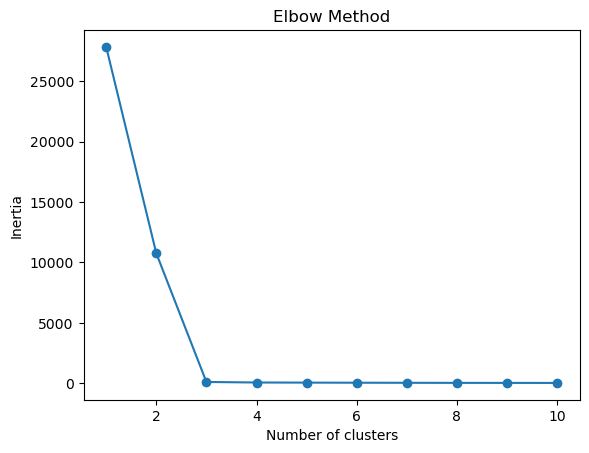

In [196]:
from sklearn.decomposition import PCA

# Extract feature variables
X = df_encoded.drop(columns=['PreviousSalary', 'Salary', 'HireDate', 'Cluster'])

# Standardize the feature variables
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA to reduce dimensionality
pca = PCA(n_components=2)  # Assuming you want to reduce to 2 components
X_pca = pca.fit_transform(X_scaled)

# Determine the optimal number of clusters using the elbow method
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_pca)
    inertia.append(kmeans.inertia_)

# Plot the elbow curve
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()



C:\Users\bhava\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\bhava\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\bhava\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\bhava\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of

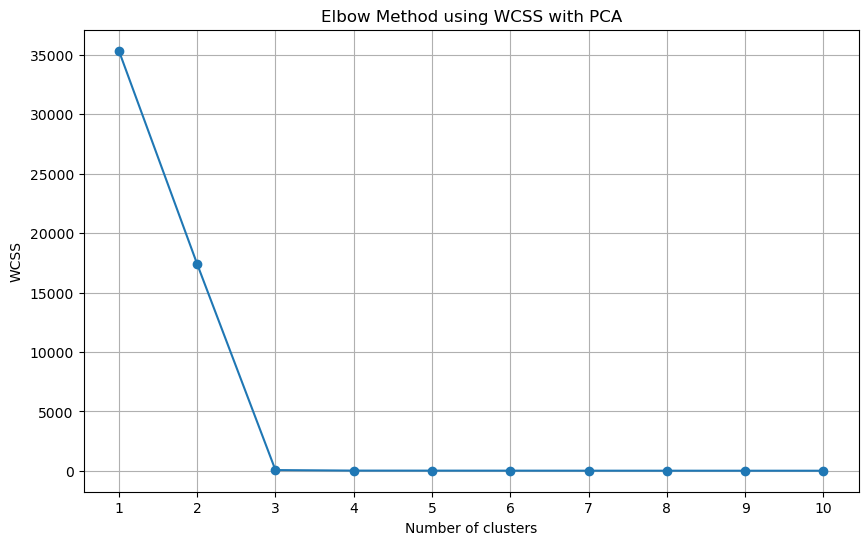

In [329]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Assuming df_encoded is your DataFrame

# Extract feature variables
X = df_encoded.drop(columns=['PreviousSalary', 'Salary', 'HireDate'])

# Standardize the feature variables
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA
pca = PCA(n_components=2)  # Specify the number of components you want to reduce to
X_pca = pca.fit_transform(X_scaled)

# Determine the optimal number of clusters using the elbow method
wcss = []  # within-cluster sum of squares
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_pca)
    wcss.append(kmeans.inertia_)  # inertia_ is used for WCSS in scikit-learn KMeans

# Plot the elbow curve
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
plt.plot(range(1, 11), wcss, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method using WCSS with PCA')
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()


Upon PCA, the steep is at 3 clusters, so 3 clusters would be enough for the data.

In [313]:
# Based on the elbow curve
n_clusters = 3  

# Perform KMeans clustering
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
clusters = kmeans.fit_predict(X_pca)

# Add cluster labels to the DataFrame
df_encoded['Cluster'] = clusters

C:\Users\bhava\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Plotting the clusters.

C:\Users\bhava\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


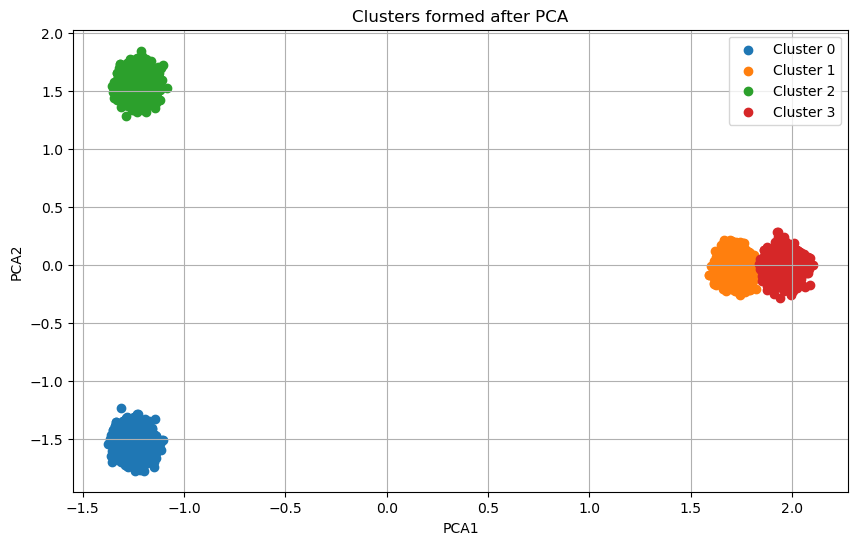

In [198]:
# Extract feature variables
X = df_encoded.drop(columns=['PreviousSalary', 'Salary', 'HireDate', 'Cluster'])

# Standardize the feature variables
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA to reduce dimensionality
pca = PCA(n_components=2)  # Assuming you want to reduce to 2 components
X_pca = pca.fit_transform(X_scaled)

# Perform KMeans clustering
kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(X_pca)

# Plot clusters
plt.figure(figsize=(10, 6))
for cluster in range(4):
    plt.scatter(X_pca[clusters == cluster, 0], X_pca[clusters == cluster, 1], label=f'Cluster {cluster}')

plt.title('Clusters formed after PCA')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.legend()
plt.grid(True)
plt.show()

In [314]:
df1=df

In [315]:
df1['Cluster'] = df_encoded['Cluster']

In [318]:
unique_rows = df1.drop_duplicates(subset='Cluster')
unique_rows

,Gender,Distance,YearsWorked,HireDate,PreviousSalary,Salary,DepartmentCode,Cluster
0,0,~20miles,8,2007-09-05,63K,66K,3,1
2,0,~15miles,7,2011-05-18,59K,60K,3,2
4,1,~10miles,9,2010-04-28,56K,57K,7,0


In [316]:
# Create a dictionary to store the target value for each cluster
cluster_targets = {}
dt={}
# Iterate over the unique rows
for index, row in unique_rows.iterrows():
    # Call the ask function with the values from the current row
#     print(row)
    target_value = sme.ask(gender=row['Gender'],
                           distance=row['Distance'],
                           years_worked=row['YearsWorked'],
                           hire_date=row['HireDate'],
                           prev_salary=row['PreviousSalary'],
                           current_salary=row['Salary'],
                           dep_code=row['DepartmentCode'])
    
    # Store the target value for each cluster
    dt[row['Cluster']] = target_value

The ask function takes features as input and returns a target value.

In [319]:
# Dictionary mapping cluster values to target values
cluster_target_mapping = { 1: 1, 2: 0, 0: 0}

# Assign target values based on cluster values
df1['Target'] = df1['Cluster'].map(cluster_target_mapping)

df1

,Gender,Distance,YearsWorked,HireDate,PreviousSalary,Salary,DepartmentCode,Cluster,Target
0,0,~20miles,8,2007-09-05,63K,66K,3,1,1
1,0,>30miles,7,2011-10-16,60K,63K,3,1,1
2,0,~15miles,7,2011-05-18,59K,60K,3,2,0
3,1,<5mile,3,2000-06-30,60K,61K,2,1,1
4,1,~10miles,9,2010-04-28,56K,57K,7,0,0
...,...,...,...,...,...,...,...,...,...
7495,0,>30miles,5,2014-03-15,60K,62K,6,1,1
7496,0,~10miles,7,2011-07-10,64K,68K,3,0,0
7497,0,~10miles,8,2006-08-19,56K,57K,2,0,0
7498,0,~20miles,6,2016-09-18,60K,62K,5,1,1


For each cluster we got a target, which we assigned to remaining data points in the cluster.

In [324]:
df_encoded['Target'] = df1['Target']

# EDA

Plotting the Correlation matrix

In [209]:
correlation_matrix = df_encoded.corr()
print(correlation_matrix)

                   Distance_<5mile  Distance_>30miles  Distance_~10miles  \
Distance_<5mile           1.000000          -0.110757          -0.216049   
Distance_>30miles        -0.110757           1.000000          -0.221244   
Distance_~10miles        -0.216049          -0.221244           1.000000   
Distance_~15miles        -0.212498          -0.217608          -0.424478   
Distance_~20miles        -0.166762          -0.170772          -0.333117   
Gender                   -0.006249           0.014590          -0.007546   
YearsWorked              -0.003748           0.003784           0.027791   
PreviousSalary            0.003906          -0.020246           0.007806   
Salary                    0.002054          -0.011311           0.006819   
DepartmentCode           -0.005478          -0.013504           0.003160   
Cluster                   0.002954           0.003025          -0.845082   
Target                    0.399446           0.409052          -0.540871   
SalaryChange

C:\Users\bhava\AppData\Local\Temp\ipykernel_25032\889165735.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df_encoded.corr()


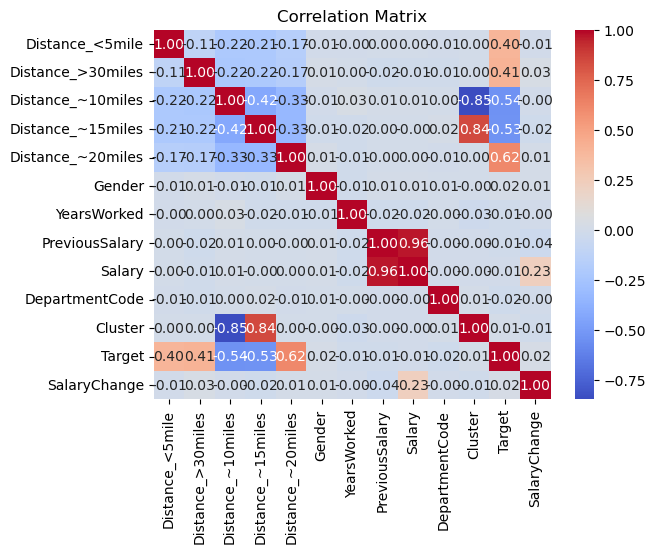

In [210]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

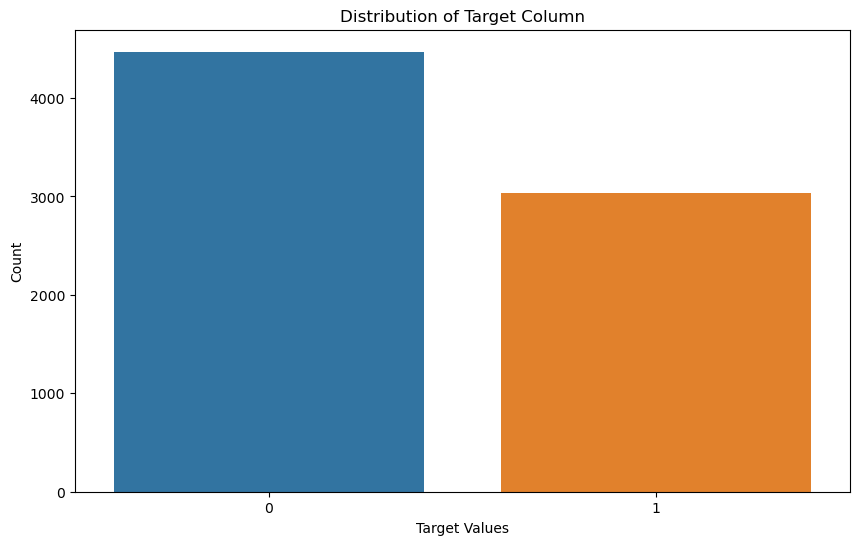

In [270]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df_encoded is your DataFrame
# Assuming target_column is your target column name

# Plotting the distribution of the target column
plt.figure(figsize=(10, 6))
sns.countplot(data=df_encoded, x='Target')
plt.title('Distribution of Target Column')
plt.xlabel('Target Values')
plt.ylabel('Count')
plt.show()


The distribution looks a little imbalanced as there are more 0(left) values

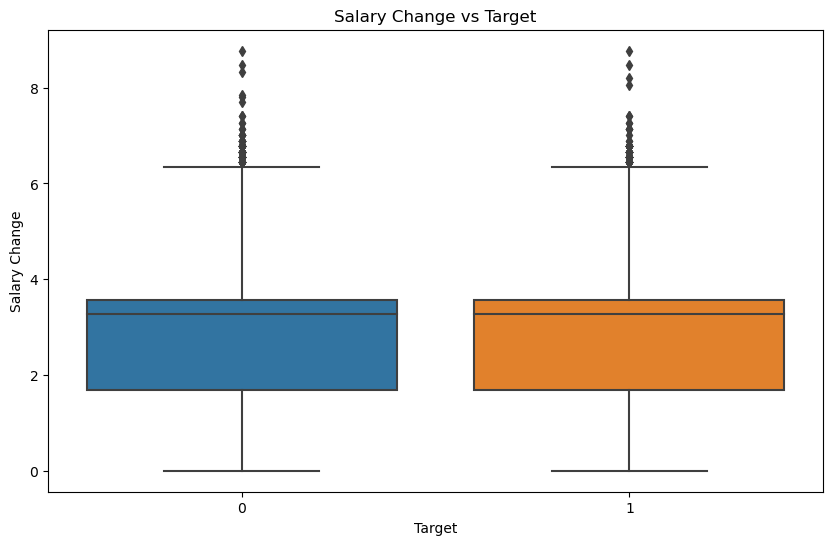

In [275]:
import seaborn as sns
import matplotlib.pyplot as plt


# Box plot
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_encoded, x='Target', y='SalaryChange')
plt.title('Salary Change vs Target')
plt.xlabel('Target')
plt.ylabel('Salary Change')
plt.show()


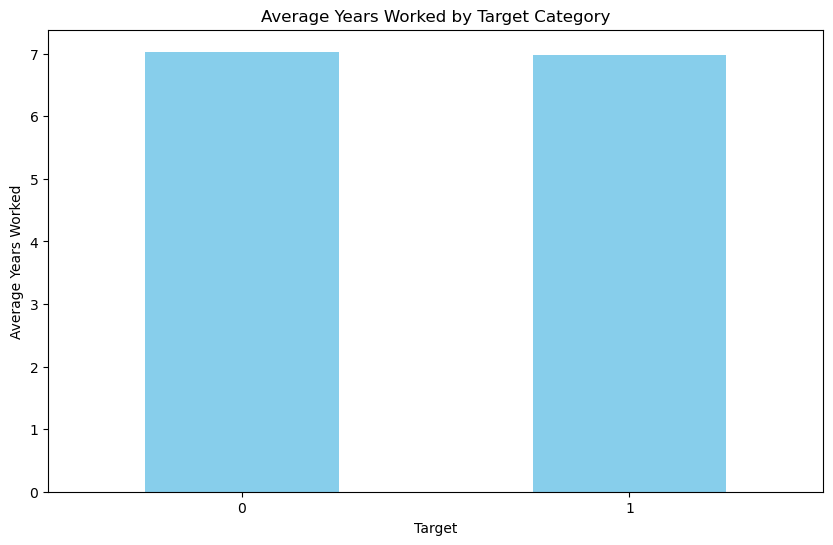

In [277]:
import matplotlib.pyplot as plt

# Calculate the mean years worked for each category of the target variable
mean_years_worked = df_encoded.groupby('Target')['YearsWorked'].mean()

# Plotting the bar graph
plt.figure(figsize=(10, 6))
mean_years_worked.plot(kind='bar', color='skyblue')
plt.title('Average Years Worked by Target Category')
plt.xlabel('Target')
plt.ylabel('Average Years Worked')
plt.xticks(rotation=0)
plt.show()


The target variable is equally distributed for these features explaining the low correaltion

### Test data preprocessing

In [250]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

# Define the indices of columns to drop
columns_to_drop = ['HireDate']

# Drop the specified columns
X_test_processed = X_test.drop(columns_to_drop, axis=1, errors='ignore')  # Use errors='ignore' to avoid KeyError

# Impute missing values in the 'Distance' column
imputer = SimpleImputer(strategy='most_frequent')
X_test_processed['Distance'] = imputer.fit_transform(X_test_processed[['Distance']])

# Extract the 'Distance' column
distance_column = X_test_processed['Distance'].values.reshape(-1, 1)

# Transform the 'Distance' column using OneHotEncoder
encoder = OneHotEncoder(sparse=False)
distance_encoded = encoder.fit_transform(distance_column)

# Convert encoded distance into DataFrame
distance_encoded_df = pd.DataFrame(distance_encoded, columns=encoder.get_feature_names_out(['Distance']))

# Drop the original 'Distance' column from X_test_processed
X_test_processed.drop('Distance', axis=1, inplace=True, errors='ignore')

# Concatenate X_test_processed with the encoded 'Distance' column
X_test_encoded = pd.concat([X_test_processed, distance_encoded_df], axis=1)

# Convert 'PreviousSalary' and 'Salary' columns to integers
X_test_encoded['PreviousSalary'] = X_test_encoded['PreviousSalary'].str.replace('K', '000').astype(float)
X_test_encoded['Salary'] = X_test_encoded['Salary'].str.replace('K', '000').astype(float)

# Calculate 'SalaryChange' column
X_test_encoded['SalaryChange'] = ((((X_test_encoded['Salary'] - X_test_encoded['PreviousSalary'])).astype(float) / X_test_encoded['PreviousSalary']) * 100).astype(float)

# Extract the indices of the columns to be converted to integers
columns_to_convert_to_int = X_test_encoded.columns

# Convert all columns to integers
X_test_encoded[columns_to_convert_to_int] = X_test_encoded[columns_to_convert_to_int].astype(int)

# Now, X_test_encoded contains the transformed features ready for prediction


C:\Users\bhava\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [251]:
# Drop 'PreviousSalary', and 'Salary' columns from X_test_encoded
X_test_features = X_test_encoded.drop([ 'PreviousSalary', 'Salary'], axis=1)

In [258]:
# Define the expected order of columns
expected_order = ['Distance_<5mile', 'Distance_>30miles', 'Distance_~10miles', 
                  'Distance_~15miles', 'Distance_~20miles', 'Gender', 
                  'YearsWorked', 'DepartmentCode', 'SalaryChange']

# Reorder the columns in X_test_features to match the expected order
X_test_features = X_test_features.reindex(columns=expected_order)


In [259]:
X_test_features

,Distance_<5mile,Distance_>30miles,Distance_~10miles,Distance_~15miles,Distance_~20miles,Gender,YearsWorked,DepartmentCode,SalaryChange
0,1,0,0,0,0,1,6,6,3
1,0,0,0,1,0,0,2,2,3
2,0,0,0,0,1,0,8,7,3
3,0,1,0,0,0,0,6,6,3
4,0,0,1,0,0,1,6,2,1
...,...,...,...,...,...,...,...,...,...
2495,0,1,0,0,0,0,9,7,1
2496,0,0,0,1,0,1,5,1,3
2497,0,0,0,0,1,0,5,6,3
2498,0,0,1,0,0,1,7,3,3


# Model evaluations

### Logistic Regression

In [330]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

# Define features and target
X = df_encoded.drop(['Target', 'Cluster','HireDate','PreviousSalary','Salary'], axis=1)  # Features
y = df_encoded['Target']  # Target


# Initialize a logistic regression model
logistic_regression_model = LogisticRegression()

# Define a pipeline with StandardScaler and LogisticRegression
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Standardize features
    ('logistic_regression', logistic_regression_model)  # Logistic Regression model
])

# Fit the model
pipeline.fit(X, y)


Pipeline(steps=[('scaler', StandardScaler()),
                ('logistic_regression', LogisticRegression())])

In [331]:
X_original = sme.get()
y_original_train = X_original['Left']

In [332]:
y_original_train

0       1
1       1
2       0
3       0
4       0
       ..
7495    1
7496    0
7497    0
7498    0
7499    1
Name: Left, Length: 7500, dtype: int64

In [333]:
# Print classification report
print(classification_report(y_original_train, y))
print

              precision    recall  f1-score   support

           0       0.98      0.79      0.88      5542
           1       0.62      0.96      0.75      1958

    accuracy                           0.84      7500
   macro avg       0.80      0.88      0.81      7500
weighted avg       0.89      0.84      0.84      7500



<function print(*args, sep=' ', end='\n', file=None, flush=False)>

In [334]:
predictions_test = pipeline.predict(X_test_features)

In [335]:
print(classification_report(y_test, predictions_test))

              precision    recall  f1-score   support

           0       0.98      0.78      0.87      1847
           1       0.61      0.94      0.74       653

    accuracy                           0.83      2500
   macro avg       0.79      0.86      0.80      2500
weighted avg       0.88      0.83      0.83      2500



# Logistic Regression with Regularization

In [266]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

# Define the pipeline steps
steps = [
    ('scaler', StandardScaler()),  # Step for feature scaling
    ('logistic_regression', LogisticRegression())  # Step for logistic regression
]

# Create the pipeline
pipeline = Pipeline(steps)

# Define the hyperparameters grid for grid search
param_grid = {
    'logistic_regression__C': [0.001, 0.01, 0.1, 1, 10, 100],  # Regularization parameter
    'logistic_regression__penalty': ['l1', 'l2']  # Regularization penalty
}

# Create the grid search object
grid_search = GridSearchCV(pipeline, param_grid, cv=5)

# Fit the grid search to the custom training data
grid_search.fit(X, y)

# Get the best parameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Get the best estimator
best_estimator = grid_search.best_estimator_

# Evaluate the best estimator on the general test data
accuracy_general = best_estimator.score(X_test_features, y_test)
print("Accuracy on general test data:", accuracy_general)

# Predict target values on the general test data
predictions_general = best_estimator.predict(X_test_features)

# Print classification report
print(classification_report(y_test, predictions_general))

Best Parameters: {'logistic_regression__C': 0.001, 'logistic_regression__penalty': 'l2'}
Accuracy on general test data: 0.8252
              precision    recall  f1-score   support

           0       0.98      0.78      0.87      1847
           1       0.61      0.94      0.74       653

    accuracy                           0.83      2500
   macro avg       0.79      0.86      0.80      2500
weighted avg       0.88      0.83      0.83      2500



C:\Users\bhava\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
30 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\bhava\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\bhava\anaconda3\Lib\site-packages\sklearn\base.py", line 1151, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\bhava\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 420, in fit
    self._final_estimator.fit

# Random Forest

In [267]:
from sklearn.ensemble import RandomForestClassifier

# Define the pipeline steps
steps_rf = [
    ('scaler', StandardScaler()),  # Step for feature scaling
    ('random_forest', RandomForestClassifier())  # Step for Random Forest Classifier
]

# Create the pipeline for Random Forest Classifier
pipeline_rf = Pipeline(steps_rf)

# Define the hyperparameters grid for grid search
param_grid_rf = {
    'random_forest__n_estimators': [50, 100, 150],  # Number of trees in the forest
    'random_forest__max_depth': [None, 10, 20],  # Maximum depth of the tree
    'random_forest__min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'random_forest__min_samples_leaf': [1, 2, 4]  # Minimum number of samples required to be at a leaf node
}

# Create the grid search object for Random Forest Classifier
grid_search_rf = GridSearchCV(pipeline_rf, param_grid_rf, cv=5)

# Fit the grid search to the custom training data
grid_search_rf.fit(X, y)

# Get the best parameters for Random Forest Classifier
best_params_rf = grid_search_rf.best_params_
print("Best Parameters for Random Forest Classifier:", best_params_rf)

# Get the best estimator for Random Forest Classifier
best_estimator_rf = grid_search_rf.best_estimator_

# Evaluate the best estimator on the general test data
accuracy_general_rf = best_estimator_rf.score(X_test_features, y_test)
print("Accuracy on general test data for Random Forest Classifier:", accuracy_general_rf)

# Predict target values on the general test data for Random Forest Classifier
predictions_general_rf = best_estimator_rf.predict(X_test_features)

# Print classification report for Random Forest Classifier
print("Classification Report for Random Forest Classifier:")
print(classification_report(y_test, predictions_general_rf))


Best Parameters for Random Forest Classifier: {'random_forest__max_depth': None, 'random_forest__min_samples_leaf': 1, 'random_forest__min_samples_split': 2, 'random_forest__n_estimators': 50}
Accuracy on general test data for Random Forest Classifier: 0.8252
Classification Report for Random Forest Classifier:
              precision    recall  f1-score   support

           0       0.98      0.78      0.87      1847
           1       0.61      0.94      0.74       653

    accuracy                           0.83      2500
   macro avg       0.79      0.86      0.80      2500
weighted avg       0.88      0.83      0.83      2500



# Support Vector Machine

In [268]:
from sklearn.svm import SVC

# Define the pipeline steps
steps_svm = [
    ('scaler', StandardScaler()),  # Step for feature scaling
    ('svm', SVC())  # Step for Support Vector Machine (SVM) Classifier
]

# Create the pipeline for SVM Classifier
pipeline_svm = Pipeline(steps_svm)

# Define the hyperparameters grid for grid search
param_grid_svm = {
    'svm__C': [0.1, 1, 10],  # Regularization parameter
    'svm__kernel': ['linear', 'rbf'],  # Kernel type
    'svm__gamma': ['scale', 'auto']  # Kernel coefficient for 'rbf' kernel
}

# Create the grid search object for SVM Classifier
grid_search_svm = GridSearchCV(pipeline_svm, param_grid_svm, cv=5)

# Fit the grid search to the custom training data
grid_search_svm.fit(X, y)

# Get the best parameters for SVM Classifier
best_params_svm = grid_search_svm.best_params_
print("Best Parameters for SVM Classifier:", best_params_svm)

# Get the best estimator for SVM Classifier
best_estimator_svm = grid_search_svm.best_estimator_

# Evaluate the best estimator on the general test data
accuracy_general_svm = best_estimator_svm.score(X_test_features, y_test)
print("Accuracy on general test data for SVM Classifier:", accuracy_general_svm)

# Predict target values on the general test data for SVM Classifier
predictions_general_svm = best_estimator_svm.predict(X_test_features)

# Print classification report for SVM Classifier
print("Classification Report for SVM Classifier:")
print(classification_report(y_test, predictions_general_svm))

Best Parameters for SVM Classifier: {'svm__C': 0.1, 'svm__gamma': 'scale', 'svm__kernel': 'linear'}
Accuracy on general test data for SVM Classifier: 0.8252
Classification Report for SVM Classifier:
              precision    recall  f1-score   support

           0       0.98      0.78      0.87      1847
           1       0.61      0.94      0.74       653

    accuracy                           0.83      2500
   macro avg       0.79      0.86      0.80      2500
weighted avg       0.88      0.83      0.83      2500



Comparing the models

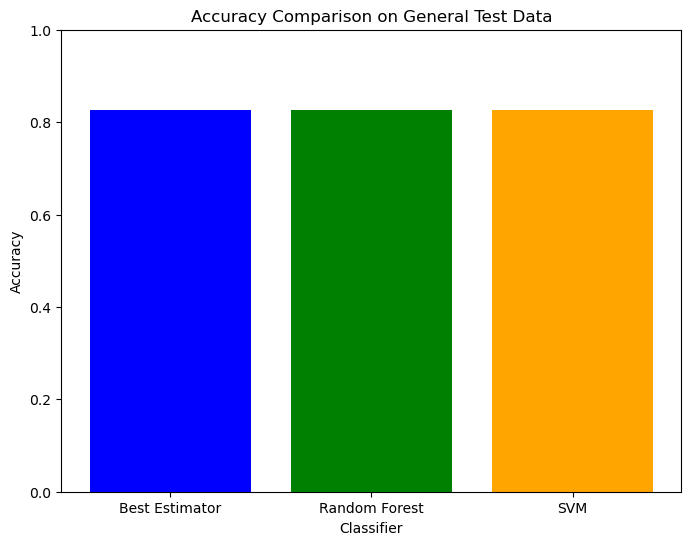

In [327]:
import matplotlib.pyplot as plt

accuracies = [accuracy_general, accuracy_general_rf, accuracy_general_svm]

classifiers = ['Best Estimator', 'Random Forest', 'SVM']

plt.figure(figsize=(8, 6))
plt.bar(classifiers, accuracies, color=['blue', 'green', 'orange'])
plt.title('Accuracy Comparison on General Test Data')
plt.xlabel('Classifier')
plt.ylabel('Accuracy')
plt.ylim(0, 1)  
plt.show()


Logistic Regression:

Best Parameters: {'C': 0.001, 'penalty': 'l2'}
Accuracy: 0.8252
Precision, recall, and F1-score for class 0 and class 1: The precision for class 0 is high (0.98), indicating a low false positive rate, while the recall for class 1 is high (0.94), indicating a low false negative rate. The F1-score balances precision and recall for both classes reasonably well.

Random Forest Classifier:

Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
Accuracy: 0.8252
Precision, recall, and F1-score for class 0 and class 1: The precision for class 0 is high (0.98), indicating a low false positive rate, while the recall for class 1 is high (0.94), indicating a low false negative rate. The F1-score balances precision and recall for both classes reasonably well.

SVM Classifier:

Best Parameters: {'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}
Accuracy: 0.8252
Precision, recall, and F1-score for class 0 and class 1: The precision for class 0 is high (0.98), indicating a low false positive rate, while the recall for class 1 is high (0.94), indicating a low false negative rate. The F1-score balances precision and recall for both classes reasonably well.
Overall Conclusion:

All three classifiers achieved comparable performance in terms of accuracy and other evaluation metrics on the general test data.
The precision and recall scores indicate that the models perform well in correctly identifying both classes (employees staying and leaving).
While the accuracy is relatively high, it's essential to consider other factors such as the cost of false positives and false negatives in the context of employee attrition prediction.
Further analysis and validation, such as cross-validation and testing on new data, can provide additional insights into the robustness and generalizability of the models.
Ultimately, the choice of the final model may depend on factors such as interpretability, computational efficiency, and specific requirements of the organization.






